In [29]:
import subprocess

def list_usb_devices():
    try: 
        # Run the lsusb command 
        result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)
        devices = result.stdout.strip().split('\n')
        return devices
    except FileNotFoundError:
        return "Error: 'lsusb' command not found. Make sure it's installed and available in the PATH."
    except subprocess.CalledProcessError as e:
        return f"Error running 'lsusb': {e}"


In [30]:
# Example usage
usb_devices = list_usb_devices()
if isinstance(usb_devices, list):
    for device in usb_devices:
        print(device)
else:
    print(usb_devices)

Bus 002 Device 002: ID 0bda:0420 Realtek Semiconductor Corp. 4-Port USB 3.0 Hub
Bus 002 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 001 Device 005: ID 062a:38df MosArt Semiconductor Corp. TIETI UltraSlim KB
Bus 001 Device 004: ID 1bcf:08a0 Sunplus Innovation Technology Inc. Gaming mouse [Philips SPK9304]
Bus 001 Device 003: ID 0bda:5420 Realtek Semiconductor Corp. 4-Port USB 2.0 Hub
Bus 001 Device 002: ID 13d3:3549 IMC Networks Bluetooth Radio
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub


Bus 002 Device 002: ID 0bda:0420 Realtek Semiconductor Corp. 4-Port USB 3.0 Hub
Bus 002 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 001 Device 005: ID 062a:38df MosArt Semiconductor Corp. TIETI UltraSlim KB
Bus 001 Device 004: ID 1bcf:08a0 Sunplus Innovation Technology Inc. Gaming mouse [Philips SPK9304]
Bus 001 Device 003: ID 0bda:5420 Realtek Semiconductor Corp. 4-Port USB 2.0 Hub
Bus 001 Device 002: ID 13d3:3549 IMC Networks Bluetooth Radio
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub

In [31]:
from dataclasses import dataclass 
from typing import Literal, List 

@dataclass 
class USBDevice:
    bus_number: str
    device_number: str
    vendor_id: str 
    product_id: str
    vendor_name: str
    product_description: str 

In [32]:
def usb_devices():
    result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)
    devices = result.stdout.strip().split('\n')
    for device in usb_devices:
        print(device)

In [33]:
usb_devices = USBTools.list_usb_devices()
for device in usb_devices:
    print(device)

NameError: name 'USBTools' is not defined

In [ ]:
def list_usb_devices():
    try: 
        # Run the lsusb command 
        result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)
        devices = result.stdout.strip().split('\n')
        return devices
    except FileNotFoundError:
        return "Error: 'lsusb' command not found. Make sure it's installed and available in the PATH."
    except subprocess.CalledProcessError as e:
        return f"Error running 'lsusb': {e}"

In [15]:
import subprocess

def list_usb_devices() -> list:
    devices = []  # Initialize empty array to store devices
    try:
        # Run the lsusb command
        result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)
        
        # Split the output into lines and process each line
        for line in result.stdout.strip().split('\n'):
            # Add each device to the array
            devices.append(line)
            
        return devices
    except FileNotFoundError:
        return ["Error: 'lsusb' command not found. Make sure it's installed and available in the PATH."]
    except subprocess.CalledProcessError as e:
        return [f"Error running 'lsusb': {e}"]

# Example usage:
if __name__ == "__main__":
    usb_devices = list_usb_devices()
    for device in usb_devices:
        print(device)

Bus 002 Device 002: ID 0bda:0420 Realtek Semiconductor Corp. 4-Port USB 3.0 Hub
Bus 002 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 001 Device 005: ID 062a:38df MosArt Semiconductor Corp. TIETI UltraSlim KB
Bus 001 Device 004: ID 1bcf:08a0 Sunplus Innovation Technology Inc. Gaming mouse [Philips SPK9304]
Bus 001 Device 003: ID 0bda:5420 Realtek Semiconductor Corp. 4-Port USB 2.0 Hub
Bus 001 Device 002: ID 13d3:3549 IMC Networks Bluetooth Radio
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub


In [19]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")


In [16]:
import subprocess 

def list_usb_devices():
    devices = []
    result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)

    for line in result.stdout.strip().split('\n'):
        devices.append(line)

    return devices

In [20]:
tools = [list_usb_devices]


from langchain_openai import ChatOpenAI 
llm = ChatOpenAI(model="gpt-4o")


llm_with_tools = llm.bind_tools(tools)

sys_msg = SystemMessage(
    content=(
        "You are a helpful assistant tasked with identifying and managing devices connected to a system. "
        "You are provided with a list of connected devices and their details. "
        "Users may ask questions about specific devices, such as identifying a particular device (e.g., 'Where is the mouse?'), "
        "or general queries about the list of connected devices. Provide precise and detailed responses based on the input list."
    )
)


In [21]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# System Message 
sys_msg = SystemMessage(
    content=(
        "You are a helpful assistant tasked with identifying and managing devices connected to a system. "
        "Users may ask questions about specific devices, such as identifying a particular device, "
        "or general queries about the list of connected devices. Provide precise and detailed responses based on the input list. "        
    )
)

In [22]:
# Node 
def assistant(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [23]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display 

# Graph 
builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant", tools_condition,)

builder.add_edge("tools", "assistant")

react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

ValueError: Function must have a docstring if description not provided.

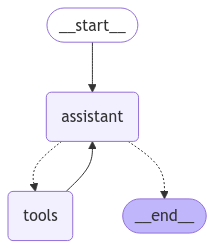

In [37]:
import subprocess
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState, StateGraph, START
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

def list_usb_devices() -> list:
    """
    Retrieves a list of all USB devices connected to the system using the lsusb command.
    
    Returns:
        list: A list of strings, where each string represents a USB device with its details
              including bus number, device ID, and description.
    """
    devices = []
    result = subprocess.run(['lsusb'], capture_output=True, text=True, check=True)
    for line in result.stdout.strip().split('\n'):
        devices.append(line)
    return devices

# Set up tools
tools = [list_usb_devices]

# Initialize LLM
llm = ChatOpenAI(model="gpt-4")
llm_with_tools = llm.bind_tools(tools)

# System Message
sys_msg = SystemMessage(
    content=(
        "You are a helpful assistant tasked with identifying and managing devices connected to a system. "
        "Users may ask questions about specific devices, such as identifying a particular device, "
        "or general queries about the list of connected devices. Provide precise and detailed responses based on the input list. "
    )
)

# Node
def assistant(state: MessagesState):
    """Process messages in the state and return LLM response."""
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Graph setup
builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

# Compile graph
react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))


In [41]:
messages = [HumanMessage(content="is there a camera connected?")]
messages = react_graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print() 

================================ Human Message =================================

is there a camera connected?
================================== Ai Message ==================================
Tool Calls:
  list_usb_devices (call_AKpHsAZ3am1KR89uXJIsugCP)
 Call ID: call_AKpHsAZ3am1KR89uXJIsugCP
  Args:
================================= Tool Message =================================
Name: list_usb_devices

["Bus 002 Device 002: ID 0bda:0420 Realtek Semiconductor Corp. 4-Port USB 3.0 Hub", "Bus 002 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub", "Bus 001 Device 005: ID 062a:38df MosArt Semiconductor Corp. TIETI UltraSlim KB", "Bus 001 Device 004: ID 1bcf:08a0 Sunplus Innovation Technology Inc. Gaming mouse [Philips SPK9304]", "Bus 001 Device 003: ID 0bda:5420 Realtek Semiconductor Corp. 4-Port USB 2.0 Hub", "Bus 001 Device 002: ID 13d3:3549 IMC Networks Bluetooth Radio", "Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub"]
================================== Ai Messag